# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# %matplotlib in inline

In [18]:
df = pd.read_csv('/users/rodri/sinasc_RO_2019.csv')



In [21]:
# Tratando as células de APGAR5 preenchidas com Nan
df = df[df['APGAR5'].notna()]
df['APGAR5'] = df['APGAR5'].apply(int)


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [22]:
df.loc[(df['APGAR5'] > 7) & (df['APGAR5'] <= 10) , 'Apgar_categoria'] = 'normal'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7) , 'Apgar_categoria'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5) , 'Apgar_categoria'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] <= 3) , 'Apgar_categoria'] = 'asfixia severa'
df[['APGAR5', 'Apgar_categoria']]

,APGAR5,Apgar_categoria
0,10,normal
1,9,normal
2,10,normal
3,10,normal
4,10,normal
...,...,...
27023,9,normal
27024,9,normal
27025,10,normal
27026,9,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

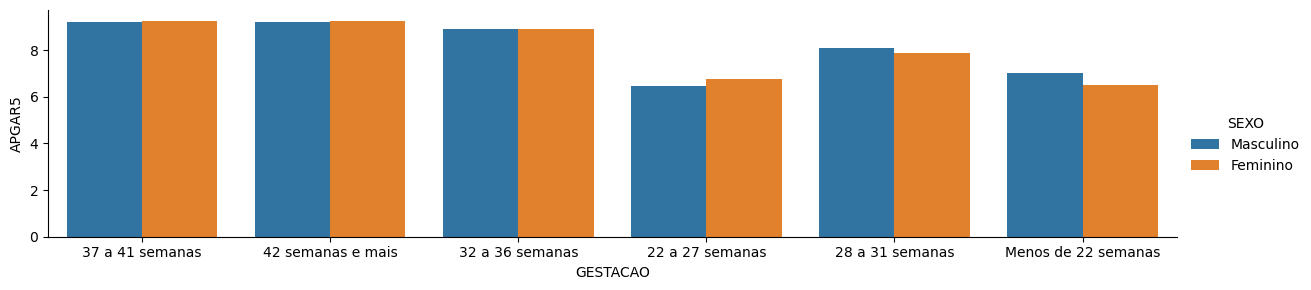

In [39]:
sns.catplot(x = 'GESTACAO' , y = 'APGAR5'
                , hue = 'SEXO'
                , kind = 'bar'
                , data = df
                , errorbar = None,
                height = 3,
                aspect = 4
               );

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [42]:
cross = pd.crosstab(df['GESTACAO'], df['Apgar_categoria']) 
cross

Apgar_categoria,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,12,1,21,51
28 a 31 semanas,18,12,3,129
32 a 36 semanas,73,19,8,2134
37 a 41 semanas,196,28,33,22266
42 semanas e mais,6,1,1,690
Menos de 22 semanas,1,0,2,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [43]:
cross_pct = cross.div(cross.sum(axis = 1), axis = 0)
cross_pct

Apgar_categoria,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,0.141176,0.011765,0.247059,0.600000
28 a 31 semanas,0.111111,0.074074,0.018519,0.796296
32 a 36 semanas,0.032677,0.008505,0.003581,0.955237
37 a 41 semanas,0.008702,0.001243,0.001465,0.988589
42 semanas e mais,0.008596,0.001433,0.001433,0.988539
Menos de 22 semanas,0.142857,0.000000,0.285714,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

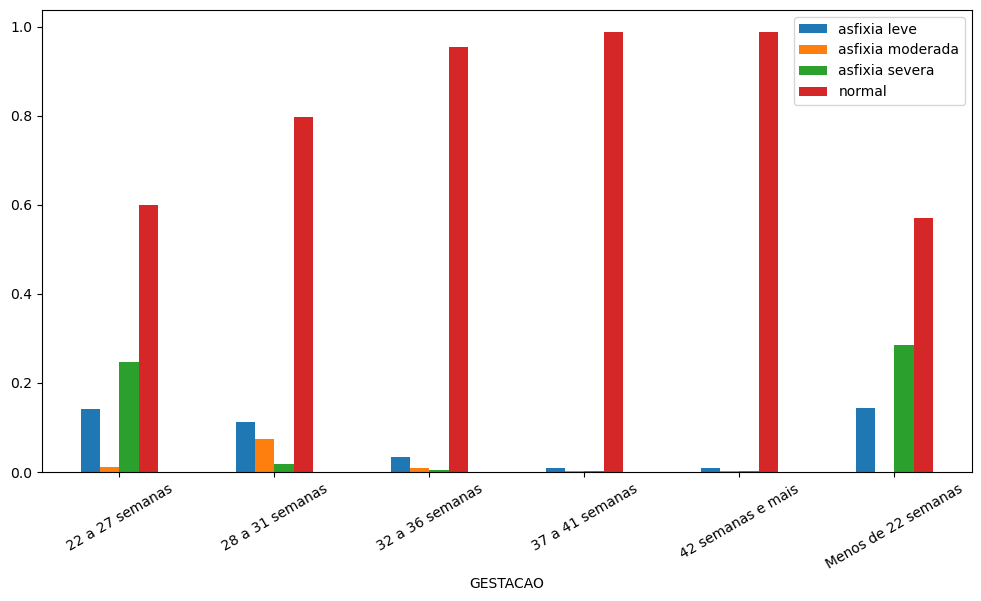

In [44]:
plt.rcParams['figure.figsize'] = (12,6)
cross_pct.plot.bar()
plt.legend(loc = 'best')
plt.xticks(rotation = 30);


Analisando o gráfico acima, vemos que o APGAR5 'normal' ele cresce de acordo com o tempo de gestação, quanto mais tempo, maior a chance do recem nascido não ter asfixia.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

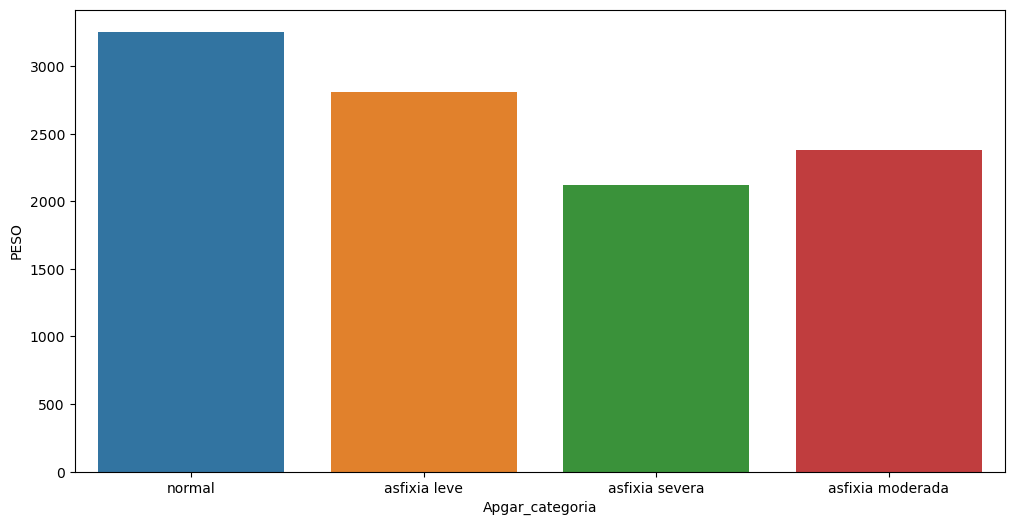

In [45]:
sns.barplot(x = 'Apgar_categoria', y = 'PESO', data = df ,  errorbar = None);

Consegue-se analisar que quanto menor o peso do recém nascido mais propenso ele está de sofrer asfixia.